# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.


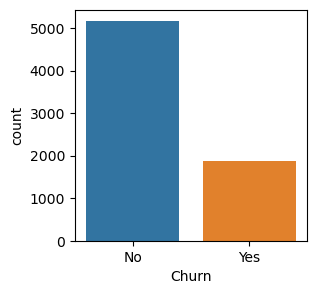

In [5]:
fig,ax = plt.subplots(figsize=(3,3))

sns.countplot(x='Churn', data=data);
plt.show()

<AxesSubplot:>

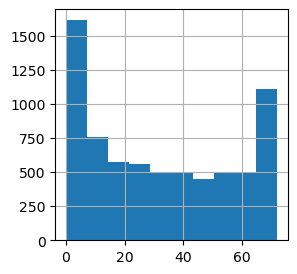

In [6]:
data['tenure'].hist(figsize=(3,3))

<AxesSubplot:>

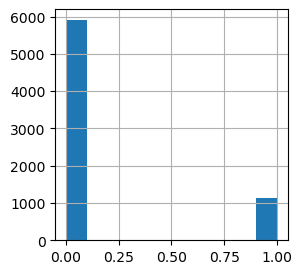

In [7]:
data['SeniorCitizen'].hist(figsize=(3,3))

<AxesSubplot:>

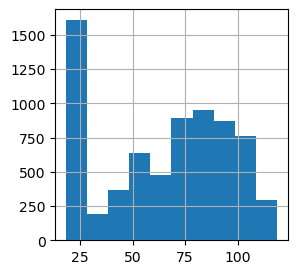

In [8]:
data['MonthlyCharges'].hist(figsize=(3,3))

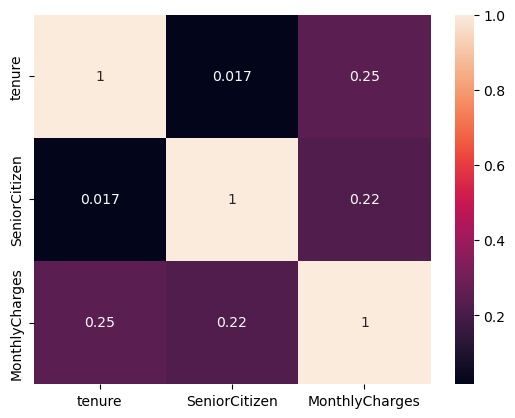

In [9]:
sns.heatmap(data[['tenure', 'SeniorCitizen', 'MonthlyCharges']].corr(), annot=True)
plt.show()

### 3. Extract the target variable.

In [10]:
y = data['Churn']

### 4. Extract the independent variables and scale them.


In [11]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [13]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler() 
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
2920,1.612532,-0.439763,0.674154
2966,-0.747907,2.273954,-0.614894
6099,1.571835,-0.439763,-1.335097
5482,0.025340,-0.439763,0.301578
2012,0.595101,-0.439763,1.128231


In [14]:
y_train.head()

2920     No
2966     No
6099     No
5482    Yes
2012    Yes
Name: Churn, dtype: object

### 5. Build the logistic regression model.


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

### 6. Evaluate the model.


In [16]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [17]:
lr.predict_proba(X_train_scaled)

array([[0.96029038, 0.03970962],
       [0.60545231, 0.39454769],
       [0.99336071, 0.00663929],
       ...,
       [0.98781232, 0.01218768],
       [0.26199018, 0.73800982],
       [0.79398402, 0.20601598]])

<AxesSubplot:xlabel='tenure'>

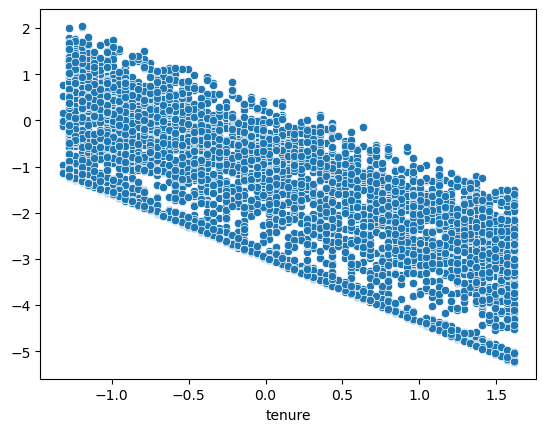

In [18]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))
sns.scatterplot(y=logits, x=X_train_scaled['tenure'])

There's a strong linear correlation between 'tenure' and 'churn'.

<AxesSubplot:xlabel='SeniorCitizen'>

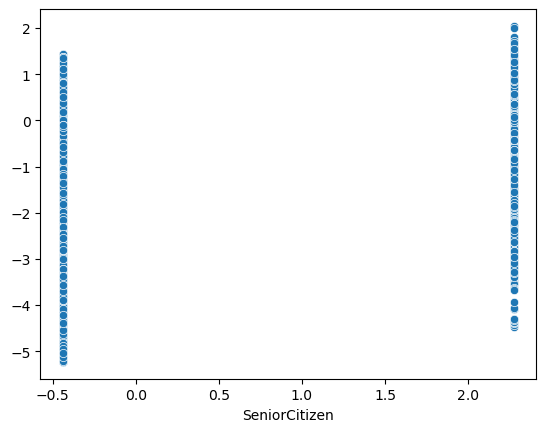

In [19]:
sns.scatterplot(y=logits, x=X_train_scaled['SeniorCitizen'])

No correlation here

<AxesSubplot:xlabel='MonthlyCharges'>

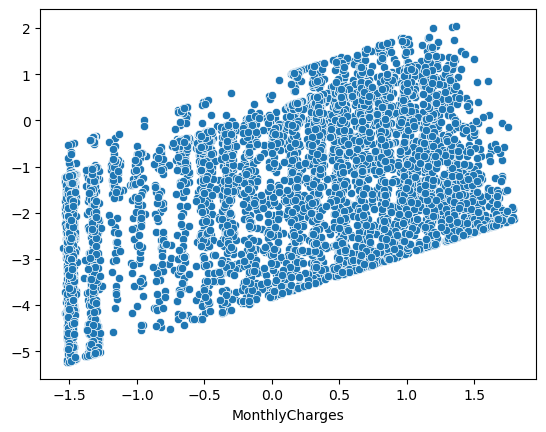

In [20]:
sns.scatterplot(y=logits, x=X_train_scaled['MonthlyCharges'])

There's a strong linear correlation between 'MonthlyCharges' and 'churn'.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.39


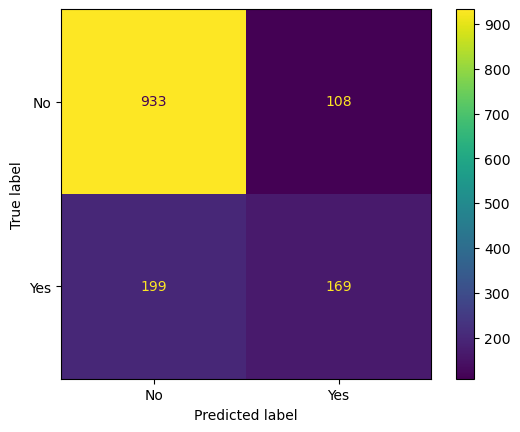

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

### 7. Even a simple model will give us more than 70% accuracy. Why?


##### So our model seems to be very good on predicting 'No' since we have enough entries with churn=No.

### 8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

print(X_train.shape)
print(X_train_SMOTE.shape)

y_train_SMOTE.value_counts()

(5634, 3)
(8266, 3)


No     4133
Yes    4133
Name: Churn, dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(random_state=0)

In [25]:
lr.predict(X_train_SMOTE)

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [26]:
lr.predict_proba(X_train_scaled)

array([[0.89941766, 0.10058234],
       [0.34317271, 0.65682729],
       [0.98210935, 0.01789065],
       ...,
       [0.96745796, 0.03254204],
       [0.10814806, 0.89185194],
       [0.58592978, 0.41407022]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.47
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.37


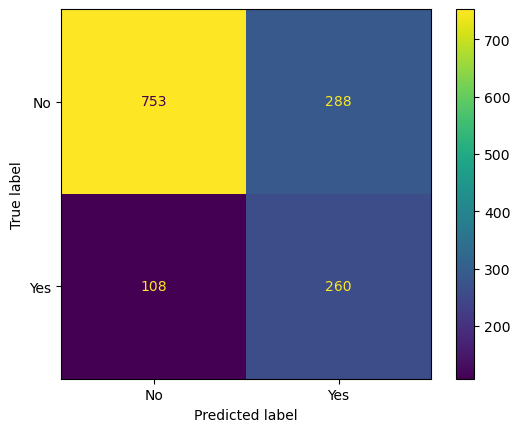

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

##### Our model improved on predicting 'Yes' labels but got worse on predicting 'No' labels.